In [15]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install dlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip3 install face_recognition

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [18]:
!pip3 install torch
!pip3 install torchvision
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# This code is to check if the video is corrupted or not.
# If the video is corrupted, video is deleted.

import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

# Checking if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100 / count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i, frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
    
# Extract a frame from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((im_size,im_size)), transforms.ToTensor(), transforms.Normalize(mean,std)])

video_fil = glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/*.mp4')
video_fil += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc03/3/*.mp4')
video_fil += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc04/4/*.mp4')
video_fil += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc05/5/*.mp4')
video_fil += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc07/7/*.mp4')
video_fil += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc08/8/*.mp4')

print("Total number of videos:", len(video_fil))
print(video_fil)

count = 0;
for i in video_fil:
  try:
    count += 1
    validate_video(i,train_transforms)
  except:
    print("Number of processed videos:", count, "| Remaining:", (len(video_fil) - count))
    print("Corrupted videos: ", i)
    continue

print((len(video_fil) - count))

Total no of videos : 11676
['/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/hjxeekdmab.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/dswaxbhfgs.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/gpqdrkflpo.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/opdknicmau.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/gwqplejvnt.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/rrsczkvqso.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/hwqatepsyz.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/vnlzxqwthl.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/ycszmelaqh.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/sckgpvbzpc.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/lapbrokvri.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/afvdmlwwyr.mp4', '/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/eexwytsgqy.mp4', '/home/gue

In [1]:
# Loading preprocessod videos to memory

import json
import glob
import numpy as np
import cv2
import copy
import random

video_files = glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc02/2/*.mp4')
video_files += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc03/3/*.mp4')
video_files += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc04/4/*.mp4')
video_files += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc05/5/*.mp4')
video_files += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc07/7/*.mp4')
video_files += glob.glob('/home/guest/CapstoneTeam77/capstoneTeam77/dfdc/dfdc08/8/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
  
print("List of count of frames:", frame_count)
print("Total number of videos:", len(frame_count))
print("Average frame per video:", np.mean(frame_count))

frames are  [300, 300, 300, 300, 300, 300, 300, 301, 300, 300, 300, 300, 301, 296, 300, 300, 300, 299, 300, 301, 300, 300, 300, 300, 301, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 296, 301, 300, 300, 300, 300, 300, 299, 300, 300, 300, 299, 300, 300, 300, 300, 300, 301, 300, 300, 300, 300, 299, 300, 300, 300, 301, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 125, 300, 300, 300, 300, 300, 300, 300, 239, 300, 299, 300, 300, 301, 300, 300, 299, 300, 298, 300, 300, 300, 300, 300, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 300, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 299, 296, 300, 299, 300, 300, 300, 300, 300, 300, 300, 298, 300, 298, 300, 300, 300, 300, 300, 300, 300, 299, 300, 300, 298, 300, 300, 300, 300, 299, 298, 300, 300, 30

In [3]:
# Loading the video names and labels from CSV file

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length = 60, transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    
    def __len__(self):
        return len(self.video_names)
    
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100 / self.count)
        first_frame = np.random.randint(0, a)
        temp_video = video_path.split('/')[-1]
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]), 1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i, frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[: self.count]
        return frames,label
    
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

# Image Plotting
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()

In [5]:
# Counting the number of fake and real videos

def number_of_real_and_fake_videos(data_list):
  header_list = ["file", "label"]
  lab = pd.read_csv('/home/guest/CapstoneTeam77/capstoneTeam77/gmetadata.csv', names = header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake += 1
    if(label == 'REAL'):
      real += 1
  return real, fake

train :  9340
test :  2336
TRAIN:  Real: 1283  Fake: 8057


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TEST:  Real: 324  Fake: 2012


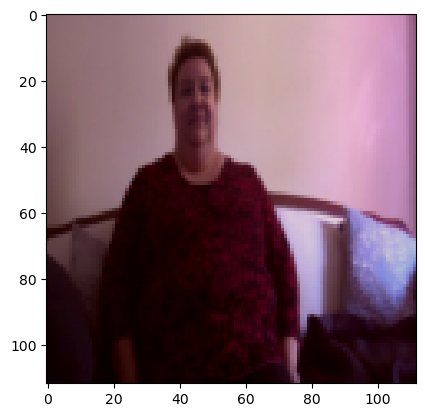

In [7]:
# Loading the labels and video in data loader

import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file", "label"]
labels = pd.read_csv('/home/guest/CapstoneTeam77/capstoneTeam77/gmetadata.csv', names = header_list)

# print(labels)
# train_videos = video_files[:int(0.9*len(video_files))]
# valid_videos = video_files[int(0.9*len(video_files)):]
train_videos,valid_videos = train_test_split(video_files, test_size = 0.2, random_state = 42)
print("Training:", len(train_videos))
print("Testing:", len(valid_videos))

print("TRAIN ->", "Real:", number_of_real_and_fake_videos(train_videos)[0], "| Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST ->", "Real:", number_of_real_and_fake_videos(valid_videos)[0], "| Fake:", number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((im_size, im_size)), transforms.ToTensor(), transforms.Normalize(mean, std)])
test_transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((im_size, im_size)), transforms.ToTensor(), transforms.Normalize(mean, std)])

train_data = video_dataset(train_videos, labels, sequence_length = 10, transform = train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length = 10, transform = train_transforms)

train_loader = DataLoader(train_data, batch_size = 4, shuffle = True, num_workers = 4)
valid_loader = DataLoader(val_data, batch_size = 4, shuffle = True, num_workers = 4)

image, label = train_data[0]
im_plot(image[0, :, :, :])

In [8]:
# Model

from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, latent_dim = 2048, lstm_layers = 3 , hidden_dim = 2048, bidirectional = True):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.2)
        self.linear1 = nn.Linear(2048, num_classes)
        self.maxpool = nn.AdaptiveMaxPool2d(1)
    
    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.maxpool(fmap)
        x = x.view(batch_size, seq_length, 2048)
        x_lstm,_ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim = 1)))

In [9]:
model = Model(2).cuda()
a, b = model(torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.cuda.FloatTensor))

/home/guest/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guest/.local/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write("\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]" % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg))
    torch.save(model.state_dict(), '/home/guest/CapstoneTeam77/checkpoint.pt')
    return losses.avg, accuracies.avg

def test(epoch, model, data_loader, criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs, 1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write("\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]" % (i, len(data_loader), losses.avg, accuracies.avg))
        print('\nAccuracy {}'.format(accuracies.avg))
    return true, pred, losses.avg, accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n = 1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)
    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100 * n_correct_elems / batch_size

In [11]:
import seaborn as sn

# Confusion Matrix

def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True Positives =', cm[0][0])
    print('False Positives =', cm[0][1])
    print('False Negatives =', cm[1][0])
    print('True Negatives =', cm[1][1])
    print('\n')

    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale = 1.4) # for label size
    sn.heatmap(df_cm, annot = True, annot_kws = {"size": 16}) # font size
    plt.ylabel('Actual Label', size = 20)
    plt.xlabel('Predicted Label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    
    plt.show()
    calculated_acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    print("Calculated Accuracy:", calculated_acc * 100)

In [14]:
def plot_loss(train_loss_avg, test_loss_avg, num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg

  print(num_epochs)
  epochs = range(1, num_epochs + 1)
  
  plt.plot(epochs, loss_train, 'g', label = 'Training Loss')
  plt.plot(epochs, loss_val, 'b', label = 'Validation Loss')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

def plot_accuracy(train_accuracy, test_accuracy, num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy

  epochs = range(1, num_epochs + 1)

  plt.plot(epochs, loss_train, 'g', label = 'Training Accuracy')
  plt.plot(epochs, loss_val, 'b', label = 'Validation Accuracy')
  plt.title('Training & Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

lr = 0.02 # Learning Rate
num_epochs = 20 # Number of epochs
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = 1e-5)

# class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
# criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()

criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []

for epoch in range(1, num_epochs + 1):
    l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch, model, valid_loader, criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)

plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))
print(confusion_matrix(true, pred))
print_confusion_matrix(true, pred)

[Epoch 1/20] [Batch 2334 / 2335] [Loss: 1.493977, Acc: 76.95%]Testing
[Batch 583 / 584]  [Loss: 4.683683, Acc: 86.13%]
Accuracy 86.13013698630137
[Epoch 2/20] [Batch 2334 / 2335] [Loss: 1.685122, Acc: 76.67%]Testing
[Batch 583 / 584]  [Loss: 0.867208, Acc: 86.13%]
Accuracy 86.13013698630137
[Epoch 3/20] [Batch 2334 / 2335] [Loss: 1.631670, Acc: 77.08%]Testing
[Batch 583 / 584]  [Loss: 0.929409, Acc: 13.87%]
Accuracy 13.86986301369863
[Epoch 4/20] [Batch 2334 / 2335] [Loss: 1.752003, Acc: 76.82%]Testing
[Batch 583 / 584]  [Loss: 0.800795, Acc: 86.13%]
Accuracy 86.13013698630137
[Epoch 5/20] [Batch 2334 / 2335] [Loss: 1.744986, Acc: 76.31%]Testing
[Batch 583 / 584]  [Loss: 0.407677, Acc: 86.13%]
Accuracy 86.13013698630137
[Epoch 6/20] [Batch 1305 / 2335] [Loss: 2.212417, Acc: 76.05%]

KeyboardInterrupt: 